## Gradio Pets

In [2]:
!pip install -Uqq fastai

In [3]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

In [4]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

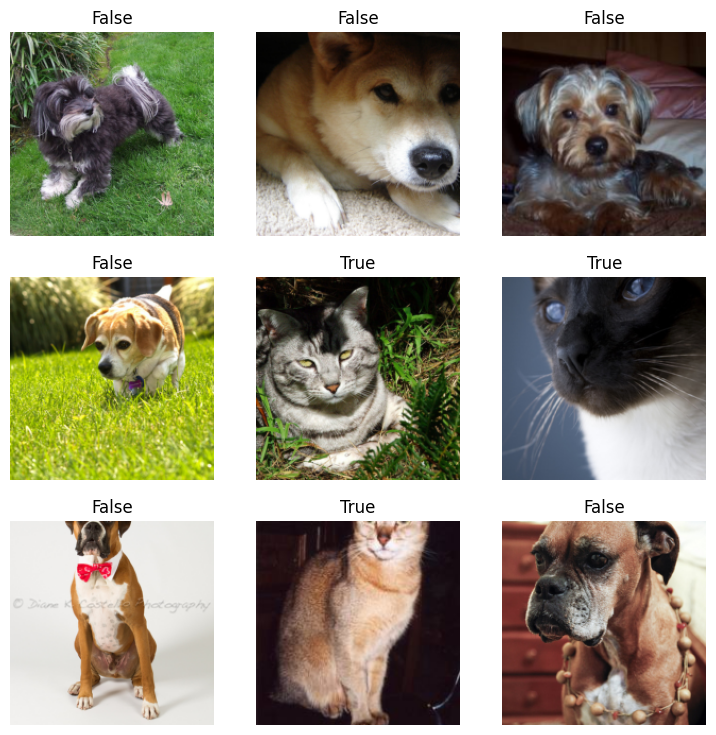

In [5]:
dls.show_batch()

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.189521,0.063847,0.020298,01:21


epoch,train_loss,valid_loss,error_rate,time
0,0.064149,0.064477,0.018268,01:50
1,0.044104,0.038162,0.011502,01:33
2,0.026203,0.027905,0.006089,01:33


In [7]:
# Export the model to the root directory so server.ipynb can find it
learn.export('../model.pkl')
print("Model exported successfully!")

Model exported successfully!


In [8]:
# Test the exported model
test_learn = load_learner('../model.pkl')
print("Model loaded successfully!")
print(f"Model classes: {test_learn.dls.vocab}")


Model loaded successfully!
Model classes: [False, True]


/Users/elgraneddy/Desktop/NS/NS/.env/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
